 Divar is an  Online Requirements Platform in Iran. Amirkabir university in Iran Held a contest with  title "Intelligent processing of Divar data'. In this contest, participants must predict what percentage of an ad will be able to be published on the Divar website. So it is a NLP question with Persian text. Hazm library has been provided for this purpose.

First, I install hazm library and some other requirements.
Hazm Repo in github. Hazm Repo in github. Check this link [https://github.com/sobhe/hazm]Hazm-GitHub for more information.

In [ ]:
pip install hazm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 5.0 MB/s 
     |████████████████████████████████| 233 kB 50.2 MB/s 
     |████████████████████████████████| 1.4 MB 44.3 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394483 sha256=91f86784c8e6f2293869cb57f177b0e0c73faebbde0c127cbc1370e099c98436
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154832 sha256=700a5b0c0d1f17ce607be22e83df4423eec73b3853aedaa80a039764670e582e
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [ ]:
pip install arabic_reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I import some usable libraries such as pandas, numpy,etc.

In [ ]:
# data analysis pkg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

# data wrangling, cleaning and wordcloud visualization pkg
from hazm import word_tokenize, stopwords_list, InformalLemmatizer
import re
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud

from tqdm import tqdm as progressbar

# Avoiding warnings
import warnings
import os
########### Prevent Warnings ###########
warnings.filterwarnings(action='ignore')
########### Prevent Warnings ###########

%matplotlib inline

I wrote my codes in GoogleColab. I connect to the colab drive.

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


The data has been given in parquet form so I import pyarrow.parquet to read the data but I have uploaded it in the google drive.


"Parquet is a columnar storage format that supports nested data.

Parquet metadata is encoded using Apache Thrift.

The Parquet-format project contains all Thrift definitions that are necessary to create readers and writers for Parquet files."
https://github.com/apache/parquet-format

In [ ]:
import pyarrow.parquet as pq
df = pq.read_table(source="/content/drive/MyDrive/DivarNLP/DMC-Train.parquet").to_pandas()

In [ ]:
df

,post_id,post_data,review_label,reject_reason_id
0,cb000599-2ee2-42c1-9f0e-32cfeb940398,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",accept,0
1,12063741-6634-444b-befa-0be4c95c2b42,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",reject,13
2,81c93119-5c06-412f-80aa-363ddb0ebc33,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",accept,0
3,b5a5bfa7-03be-408b-b4d9-bca26c0ca59b,"{""brand"": ""\u0633\u0627\u06cc\u0631"", ""brand_m...",accept,0
4,3414e920-dfaf-44a8-9853-0b03d66e9e2a,"{""body_status"": ""intact"", ""brand"": ""\u067e\u06...",reject,12
...,...,...,...,...
540357,57d8583a-762d-49df-a1ea-fde6ae63e35b,"{""brand"": ""\u0633\u0627\u06cc\u0631"", ""brand_m...",accept,0
540358,7bace186-9fc3-450b-9c23-3a109fa1f455,"{""body_status"": ""some-scratches"", ""brand"": ""\u...",reject,145
540359,d8014824-d3e7-4a0a-9863-df11021f23d4,"{""body_status"": ""some-scratches"", ""brand"": ""\u...",accept,0
540360,ee2bdfaf-773e-430e-9e04-cc250e7a27c6,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",accept,0


As you see we have four columns, "post_id","post_data","review_label","reject_reason_id". The last column is for more information about the reason of acceptance or rejection of ads. 

Relationship between Features and Survival
In this section, we analyze relationship between different features with respect to reviw_label. We see how different feature values show different acceptance chance. We also plot different kinds of diagrams to visualize our data and findings.

In review_label I replace 'accept' with 1 and 'reject' with 0.

In [ ]:
Acceptance= df.review_label.replace('accept',1,inplace=True)
Not_Acceptance= df.review_label.replace('reject',0,inplace=True)


Now we compute how many 1 and 0 we have in review_label column.

In [ ]:
df['review_label'].value_counts()

1    416370
0    123992
Name: review_label, dtype: int64

In [ ]:
# print ("review_label: %i (%.1f%%)"%(len(Acceptance), float(len(Acceptance))/len(df)*100.0))
# print ("Not_Acceptance: %i (%.1f%%)"%(len(Not_Acceptance), float(len(Not_Acceptance))/len(df)*100.0))
# print ("Total: %i"%len(df))

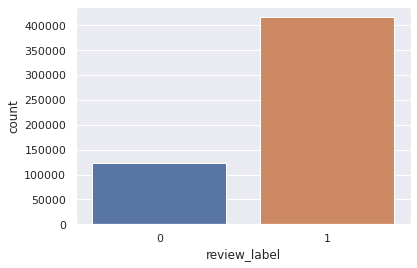

In [ ]:
df.review_label = df.review_label.astype('int')
sns.countplot(df.review_label)

As we can see our labels are unbalanced so in the following we should keep in mind to balance them.

In [ ]:
df.head(10)

,post_id,post_data,review_label,reject_reason_id
0,cb000599-2ee2-42c1-9f0e-32cfeb940398,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0
1,12063741-6634-444b-befa-0be4c95c2b42,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",0,13
2,81c93119-5c06-412f-80aa-363ddb0ebc33,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0
3,b5a5bfa7-03be-408b-b4d9-bca26c0ca59b,"{""brand"": ""\u0633\u0627\u06cc\u0631"", ""brand_m...",1,0
4,3414e920-dfaf-44a8-9853-0b03d66e9e2a,"{""body_status"": ""intact"", ""brand"": ""\u067e\u06...",0,12
5,10aa8a3b-e465-45c4-a218-5b366f6d46af,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",0,12
6,79f05181-ddfd-44b5-a8dc-82f2ce9d4f06,"{""body_status"": ""intact"", ""brand"": ""\u067e\u06...",1,0
7,3845f74f-6731-44fa-82fc-774eeb4c83d7,"{""body_status"": ""few-spots-of-color"", ""brand"":...",1,0
8,6fdbdc90-dc85-49ea-a177-9c780389c081,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",0,139
9,c8ba52f7-7025-4f80-9be9-489827bd0988,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0


Values of column 'post_data' are in dictionary form. So first we import json to conver dictionary string to dictionary and see the 0 ondex of this column. 


In [ ]:
# convert dictionary string to dictionary
# using json.loads()
import json 
# using json.loads()
# convert dictionary string to dictionary
a=df.post_data[0]
res = json.loads(a)
  
# print result
str(res)

"{'body_status': 'witout-color', 'brand': 'تیبا::Tiba', 'brand_model': 'Tiba Sedan SX', 'category': 'light', 'color': 'سفید', 'description': 'بدون رنگ،کم کارکرد', 'document': 'single-sheet', 'gearbox': 'manual', 'new_price': 103000000, 'post_type': 'فروشی', 'selling_type': 'cash', 'third_party_insurance_deadline': '5', 'title': 'تیبا صندوق\\u200cدار SX، مدل ۱۳۹۷', 'usage': 23000, 'year': '۱۳۹۷'}"

Then we merge the columns which has been added by dictionary to the previous column. We use pd.concat() . It takes some time.

---



In [ ]:
import json 
import pandas as pd
dff=pd.concat([df, df.post_data.apply(json.loads).apply(pd.Series)], axis=1)

We copy the dataframe dff as dataa

In [ ]:
dataa=dff.copy()

Transform "dataa" to a csv file

In [ ]:
dataa.to_csv('dataa.csv', index=False)

Now read the dataa.csv

In [ ]:
dffff=pd.read_csv("dataa.csv")

Save dataa.csv to our drive.

In [ ]:
!cp dataa.csv "drive/My Drive/"

Let's take a look to our dataframe 'dffff'

# Looking into the training dataset
Printing first 5 rows of the train dataset.



In [ ]:
dffff.head(5)

,post_id,post_data,review_label,reject_reason_id,body_status,brand,brand_model,category,color,description,document,gearbox,new_price,post_type,selling_type,third_party_insurance_deadline,title,usage,year,options
0,cb000599-2ee2-42c1-9f0e-32cfeb940398,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0,witout-color,تیبا::Tiba,Tiba Sedan SX,light,سفید,بدون رنگ،کم کارکرد,single-sheet,manual,103000000.0,فروشی,cash,5.0,تیبا صندوق‌دار SX، مدل ۱۳۹۷,23000.0,۱۳۹۷,NaN
1,12063741-6634-444b-befa-0be4c95c2b42,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",0,13,witout-color,لیفان::Lifan,Lifan X60 manual,light,سفید,اسفند 95\nبیمه بدنه کلا تخفیف \nمانیتور 10 این...,single-sheet,manual,26700000.0,فروشی,cash,1.0,لیفان X60 دنده‌ای، مدل ۱۳۹۵,120000.0,۱۳۹۵,NaN
2,81c93119-5c06-412f-80aa-363ddb0ebc33,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0,witout-color,پژو ۴۰۵::Peugeot 405,Peugeot 405 SLX,light,خاکستری,بیمه شخص ثالث،بیمه بدنه،دارای روکش صندلی و کفی...,single-sheet,manual,190000000.0,فروشی,cash,8.0,پژو 405 SLX بنزینی، مدل ۱۳۹۹,1400.0,۱۳۹۹,{'electric_folding_mirror': True}
3,b5a5bfa7-03be-408b-b4d9-bca26c0ca59b,"{""brand"": ""\u0633\u0627\u06cc\u0631"", ""brand_m...",1,0,NaN,سایر,Dena basic 1700cc,light,سفید صدفی,■نمایندگی رجبی کد ۵٣٠٧٣٢\n□فروش نقدی ■ شعبه تو...,NaN,NaN,NaN,فروشی,NaN,NaN,دنا DENA معمولی EF7 صفر // مدل 99 خشک آماده تحویل,0.0,۱۳۹۹,NaN
4,3414e920-dfaf-44a8-9853-0b03d66e9e2a,"{""body_status"": ""intact"", ""brand"": ""\u067e\u06...",0,12,intact,پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,Peugeot 206 SD V8,light,سفید,ماشین صفر برج ۹سال ۹۹ سند رهن ایران خودرو,single-sheet,manual,240000000.0,فروشی,cash,7.0,پژو 206 SD V8، مدل ۱۳۹۹,800.0,۱۳۹۹,NaN


In [ ]:
dffff.columns

Index(['post_id', 'post_data', 'review_label', 'reject_reason_id',
       'body_status', 'brand', 'brand_model', 'category', 'color',
       'description', 'document', 'gearbox', 'new_price', 'post_type',
       'selling_type', 'third_party_insurance_deadline', 'title', 'usage',
       'year', 'options'],
      dtype='object')

Below is a brief information about each columns of the dataset:

1.   'post_id':Unique id of the post
2.   'post_data
3.   'review_label'
4.   'reject_reason_id'
5.   'body_status'
6.   'brand':english and persian name of the brand separated with ::(two colons)
7.   'brand_model'
8.   'category'
10.  'color'
11.  'description'
12.  'document'
13.  'gearbox'
14.  'new_price':Price of the post in Iranian Toman.
15.  'post_type'
16.  'selling_type'
17.  'third_party_insurance_deadline'
18.  'title':Title of the post. 
19.  'usage'
20.   'year'
21.   'options'

Total rows and columns

We can see that there are 540362 rows and 20 columns in our training dataset.

In [ ]:
dffff.shape

(540362, 20)

We use info() method to see more information of our train dataset.



In [ ]:
dffff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540362 entries, 0 to 540361
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   post_id                         540362 non-null  object 
 1   post_data                       540362 non-null  object 
 2   review_label                    540362 non-null  int64  
 3   reject_reason_id                540362 non-null  int64  
 4   body_status                     427747 non-null  object 
 5   brand                           540340 non-null  object 
 6   brand_model                     540341 non-null  object 
 7   category                        540362 non-null  object 
 8   color                           523122 non-null  object 
 9   description                     540362 non-null  object 
 10  document                        423758 non-null  object 
 11  gearbox                         428203 non-null  object 
 12  new_price       

We can see that ..... value is missing for many rows.

Out of ....  rows, the value is present only in .... rows.

Similarly, Cabin values are also missing in many rows. Only ... out of ... rows have Cabin values.

Describing training dataset

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [ ]:
dffff.describe()

,review_label,reject_reason_id,new_price,third_party_insurance_deadline,usage
count,540362.000000,540362.000000,4.022780e+05,420933.000000,540344.000000
mean,0.770539,21.240174,2.076257e+08,7.889914,105651.165735
std,0.420487,50.635343,7.809686e+08,3.465773,115980.108330
min,0.000000,0.000000,1.000000e+06,1.000000,0.000000
25%,1.000000,0.000000,6.300000e+07,5.000000,290.000000
50%,1.000000,0.000000,1.120000e+08,8.000000,70000.000000
75%,1.000000,0.000000,1.930000e+08,11.000000,180000.000000
max,1.000000,163.000000,5.000000e+10,12.000000,500000.000000


describe(include = ['O']) will show the descriptive statistics of object data types.



In [ ]:
dffff.describe(include=['O'])

,post_id,post_data,body_status,brand,brand_model,category,color,description,document,gearbox,post_type,selling_type,title,year,options
count,540362,540362,427747,540340,540341,540362,523122,540362,423758,428203,540345,420594,540356,540345,111297
unique,540362,532875,16,30,1134,1,38,508563,3,2,1,3,188015,36,8844
top,cb000599-2ee2-42c1-9f0e-32cfeb940398,"{""body_status"": ""few-spots-of-color"", ""brand"":...",witout-color,سایر,Pride Sedan petrol,light,سفید,***********,single-sheet,manual,فروشی,cash,کوییک دنده‌ای، مدل ۱۳۹۹,۱۳۹۹,{'sensor': True}
freq,1,102,138515,98878,20645,540362,291112,1248,229382,372642,540345,398029,2852,77751,13764


This shows that there are ...

In [ ]:
dffff.isnull().sum()


post_id                                0
post_data                              0
review_label                           0
reject_reason_id                       0
body_status                       112615
brand                                 22
brand_model                           21
category                               0
color                              17240
description                            0
document                          116604
gearbox                           112159
new_price                         138084
post_type                             17
selling_type                      119768
third_party_insurance_deadline    119429
title                                  6
usage                                 18
year                                  17
options                           429065
dtype: int64

There are ... rows with missing ....., ... rows with missing ...... and ... rows with missing Embarked information.

As we see wee have 20 columns with text value and number value.
Let's start with 'color' column. In this column we replace unwanted string '\u200c' with empty space.

In [ ]:
dffff['color'] = dffff['color'].str.replace('\u200c','')

In [ ]:
dffff['color']

0              سفید
1              سفید
2           خاکستری
3         سفید صدفی
4              سفید
            ...    
540357    سفید صدفی
540358         سفید
540359       نقرهای
540360         سفید
540361         سفید
Name: color, Length: 540362, dtype: object

I replace the text value of column 'color' which are the name of colors to the number value. I do not use OneHotEncoder cause the number of columns are alot and OneHotEncoder makes sparse problem.

---



In [ ]:
dffff['color'].replace(['سفید', 'خاکستری', 'سفید صدفی', 'آبی', 'دلفینی', 'نوکمدادی', 'زرد',
       'نقرهای', 'مشکی', 'سرمهای', 'یشمی', 'سبز', 'طوسی', 'عنابی',
       'اطلسی', 'نقرآبی', 'بادمجانی', 'قهوهای', 'بنفش', 'قرمز', 'بژ',
       'مسی', 'زرشکی', 'نارنجی', 'آلبالویی', 'کرم', 'ذغالی', 'کربنبلک',
       'موکا', 'طلایی', 'پوستپیازی', 'زیتونی', 'برنز', 'عدسی', 'سربی',
       'خاکی', 'تیتانیوم', 'گیلاسی'],  
       [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38],inplace=True)

Fill nan value with zero.

In [ ]:
dffff["color"]=dffff["color"].fillna(0)

At the end change the type of values to integers.

In [ ]:
dffff['color'] = dffff['color'].astype(int)

The next column which we want to consider is "selling_type" column. Let's see what are the values of this column.

In [ ]:
dffff['selling_type'].unique()

array(['cash', nan, 'cash-instalment', 'instalment'], dtype=object)

As we see this column has four values, "cash", "cash_instalment" and "instalment" and nan values. For filling the nan values we use value_counts and fill them with the most common value.

In [ ]:
dffff['selling_type'].value_counts()

cash               398029
cash-instalment     18887
instalment           3678
Name: selling_type, dtype: int64

We replace this text values with numbers and nan value with the number of most prevalent one.

In [ ]:
dffff["selling_type"]=dffff["selling_type"].fillna(2)

In [ ]:
dffff["selling_type"] = dffff["selling_type"].replace({"cash": 1,"cash-instalment":2,"instalment":3})

In [ ]:
# dffff[dffff['year'] == '۱۳۶۶'].index.values

In [ ]:
# dffff.drop(dffff.index[dffff['year'] == 'قبل از ۱۳۶۶'], inplace = True)

In [ ]:
# dffff['year'] = dffff['year'].replace({'nan':1360})

The 'year' column is the next to have a look. If we want to see tha nan index in this column we write the following code.


In [ ]:
dffff[dffff['year'] == 'nan'].index.values

array([ 21293,  60334,  96577, 118397, 157487, 213345, 215219, 254769,
       279179, 300430, 309038, 329327, 375731, 389015, 461292, 473795,
       528513])

Now I replace the value which has both text and number as just the number

In [ ]:
dffff['year'] = dffff['year'].replace({'قبل از ۱۳۶۶':1366})

The numbers of column 'color' are in percian format so I replace the one number which is in English format 

In [ ]:
dffff['year'] = dffff['year'].replace({'1366':'۱۳۶۶'})

In [ ]:
dffff['year']=dffff['year'].map({1366:'۱۳۶۶','۱۳۹۶':'۱۳۹۶','۱۴۰۰':'۱۴۰۰','۱۳۸۶':'۱۳۸۶','۱۳۸۱':'۱۳۸۱','۱۳۸۷':'۱۳۸۷','۱۳۸۴':'۱۳۸۴',
                                    '۱۳۹۷': '۱۳۹۷','۱۳۹۰':'۱۳۹۰','۱۳۸۹':'۱۳۸۹','۱۳۸۳':'۱۳۸۳','۱۳۹۵':'۱۳۹۵','۱۳۹۹':'۱۳۹۹','۱۳۹۴':'۱۳۹۴','۱۳۹۸':'۱۳۹۸',
                                   '۱۳۹۳':'۱۳۹۳','۱۳۹۲':'۱۳۹۲','۱۳۷۹':'۱۳۷۹','۱۳۹۱':'۱۳۹۱','۱۳۷۶':'۱۳۷۶','۱۳۷۷':'۱۳۷۷','۱۳۷۸':'۱۳۷۸','۱۳۷۱':'۱۳۷۱',
                                  '۱۳۸۵':'۱۳۸۵','۱۳۸۲':'۱۳۸۲', '۱۳۸۸':'۱۳۸۸','۱۳۸۰':'۱۳۸۰','۱۳۶۶':'۱۳۶۶','۱۳۷۰':'۱۳۷۰','۱۳۷۵':'۱۳۷۵','۱۳۶۷':'۱۳۶۷',
                                 '۱۳۷۳':'۱۳۷۳','۱۳۷۲':'۱۳۷۲', '۱۳۷۴':'۱۳۷۴','۱۳۶۹':'۱۳۶۹','۱۳۶۸':'۱۳۶۸','1360':'۱۳۶۰' ,'nan':'۱۳۶۰'})

In [ ]:
dffff['year'] = dffff['year'].replace({1360:'۱۳۶۰'})

In [ ]:
dffff['year']=dffff['year'].apply(str)

In [ ]:
dffff['year'] = dffff['year'].astype(int)

In [ ]:
dffff[dffff['year'] == 'nan'].index.values

array([], dtype=int64)

In [ ]:
dffff['year'].unique()

array([1397, 1395, 1399, 1392, 1400, 1393, 1380, 1384, 1382, 1379, 1394,
       1398, 1381, 1390, 1386, 1387, 1383, 1388, 1391, 1396, 1385, 1389,
       1377, 1366, 1372, 1376, 1378, 1367, 1375, 1373, 1371, 1368, 1369,
       1370, 1374, 1360])

In [ ]:
dffff.shape

(540362, 20)

About column "third_party_insurance_deadline" first we check the unique values of this column and then fill the null values.

In [ ]:
dffff["third_party_insurance_deadline"].unique()

array([ 5.,  1.,  8., nan,  7., 12.,  4., 11.,  9., 10.,  2.,  6.,  3.])

In [ ]:
dffff["third_party_insurance_deadline"]=dffff["third_party_insurance_deadline"].fillna(0)

In [ ]:
dffff['third_party_insurance_deadline'] = dffff['third_party_insurance_deadline'].astype(int)

I replace the text value of column 'brand' which are the name of brands to the number value. I do not use OneHotEncoder cause the number of columns are alot and OneHotEncoder makes sparse problem.

In [ ]:
dffff["brand"] = dffff["brand"].replace({'تیبا::Tiba': 1})

In [ ]:
dffff["brand"] = dffff["brand"].replace({'لیفان::Lifan': 2, 'پژو ۴۰۵::Peugeot 405':3, 
'پژو ۲۰۶\u200d صندوق\u200cدار::Peugeot 206':4, 'نیسان::Nissan':5, 'پژو ۲۰۷::Peugeot 207':6, 'پژو پارس::Peugeot Pars':7, 
 'پراید هاچ\u200cبک::Pride':8,  'پیکان::Peykan':9, 'پژو ۲۰۶\u200d::Peugeot 206':10,  'پراید صندوق\u200cدار::Pride':11, 'ام\u200cوی\u200cام::MVM':12,
  'زانتیا::Citroen Xantia':13, 'مزدا::Mazda':14,  'کیا::Kia':15, 'رنو::Renault':16, 'سمند::Samand':17, 'تندر ۹۰::Tondar 90':18,
   'تویوتا::Toyota':19,  'هیوندای (غیره)::Hyundai':20, 'رانا::Runna':21, 'هیوندای آزرا::Hyundai Azera':22, 'بی\u200cام\u200cو::BMW':23,
    'هیوندای سوناتا::Hyundai Sonata':24,  'بنز::Mercedes-Benz':25, 'دوو::Daewoo':26,
                                      'گل::Gol' :27, 'پژو روآ / آر\u200cدی::RD/ROA':28})

In [ ]:
dffff["brand"] = dffff["brand"].replace(to_replace ="وانت",
                 value =29)

In [ ]:
dffff["brand"] = dffff["brand"].replace(to_replace ="سایر",
                 value =30)

In [ ]:
dffff["brand"]=dffff["brand"].fillna(0)

In [ ]:
dffff['brand'] = dffff['brand'].astype(int)

The same thing happen to "body_status" column.

In [ ]:
dffff["body_status"] = dffff["body_status"].replace({'witout-color': 1, 'intact':2, 'few-spots-of-color':3,  'multiple-spots-paint':4, 
                                                  'half-paint' :5, 'two-spots-of-color':6, 'one-spot-paint':7, 'two-spots-paint':8, 'some-scratches':9,
                                                    'full-paint':10, 'one-spot-of-color':11,  'by-accident':12, 'out':13,'paintless-dent-removal':14,
                                              'accidental'     :15, 'junk':16})

In [ ]:
dffff["body_status"]=dffff["body_status"].fillna(0)

In [ ]:
dffff['body_status'] = dffff['body_status'].astype(int)

In [ ]:
dffff.head(3)

,post_id,post_data,review_label,reject_reason_id,body_status,brand,brand_model,category,color,description,document,gearbox,new_price,post_type,selling_type,third_party_insurance_deadline,title,usage,year,options
0,cb000599-2ee2-42c1-9f0e-32cfeb940398,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0,1,1,Tiba Sedan SX,light,1,بدون رنگ،کم کارکرد,single-sheet,manual,103000000.0,فروشی,1,5,تیبا صندوق‌دار SX، مدل ۱۳۹۷,23000.0,1397,NaN
1,12063741-6634-444b-befa-0be4c95c2b42,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",0,13,1,2,Lifan X60 manual,light,1,اسفند 95\nبیمه بدنه کلا تخفیف \nمانیتور 10 این...,single-sheet,manual,26700000.0,فروشی,1,1,لیفان X60 دنده‌ای، مدل ۱۳۹۵,120000.0,1395,NaN
2,81c93119-5c06-412f-80aa-363ddb0ebc33,"{""body_status"": ""witout-color"", ""brand"": ""\u06...",1,0,1,3,Peugeot 405 SLX,light,2,بیمه شخص ثالث،بیمه بدنه،دارای روکش صندلی و کفی...,single-sheet,manual,190000000.0,فروشی,1,8,پژو 405 SLX بنزینی، مدل ۱۳۹۹,1400.0,1399,{'electric_folding_mirror': True}


In [ ]:
dffff["gearbox"].unique()

array(['manual', nan, 'automatic'], dtype=object)

In [ ]:
dffff["gearbox"].value_counts()

manual       372642
automatic     55561
Name: gearbox, dtype: int64

In [ ]:
dffff["gearbox"] = dffff["gearbox"].replace({"automatic": 0,"manual":1})

In [ ]:
dffff["gearbox"]=dffff["gearbox"].fillna(0)

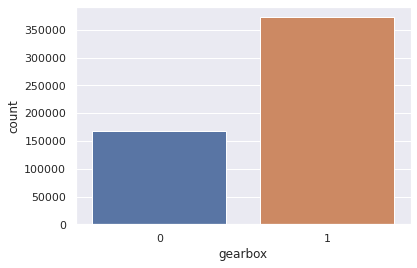

In [ ]:
dffff.gearbox = dffff.gearbox.astype('int')
sns.countplot(dffff.gearbox)

In [ ]:
import re # for regex
def clean(text):
    cleaned = re.compile(r'\n')
    return re.sub(cleaned,'',text)

dffff.description = dffff.description.apply(clean)

In [ ]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

dffff.description = dffff.description.apply(is_special)

In [ ]:
import re # for regex
def clean5(text):
    cleaned = re.compile(r'\\u')
    return re.sub(cleaned,'',text)

dffff.description = dffff.description.apply(clean5)

In [ ]:
dffff['text'] = dffff['title'] + " "+ dffff['description']

In [ ]:
def set_types(df):
    df.title = df.title.astype(str)
    df.description = df.description.astype(str)
    return df

In [ ]:
dffff=set_types(dffff)

In [ ]:
def replace_nan(entry):
    if entry == 'nan':
        return '#'
    return entry
dffff.title = dffff.title.apply(replace_nan)
dffff.description = dffff.description.apply(replace_nan)

In [ ]:
# dffff.drop_duplicates(subset =['description', 'title'], inplace = True)


In [ ]:
lemma = InformalLemmatizer()

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py  emoticons list
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt Chat shortcuts

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r' ', text)

def remove_punctuations(text):
    punctuations = re.compile(r'[~`!@#$%^&*(,<،>){}\\/|\'"?؟_+-=~\[\]]')
    return punctuations.sub(r' ', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r' ', text)

def remove_weird_chars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    patterns = [re.compile('\r'), re.compile('\n'), re.compile('&amp;')]
    text = weridPatterns.sub(r'', text)
    for p in patterns:
        text = p.sub(r' ', text)
    return text

def remove_extra_repeated_alpha(text):
    """
    Remove extra repeated alphabets in a word
    check these links:
    demo : https://regex101.com/r/ALxocA/1
    Question: https://bit.ly/2DoiPqS
    """
    return re.sub(r'([^\W\d_])\1{2,}', r'\1', text)


def clean_up(text, url=True, html=True, weird_patterns=True , lemmatize=False, 
               stopwords=True, isalpha=False, punctuations=True, remove_extra_alpha=True):
    # remove url
    if url:
        text = remove_urls(text)
    # remove html tags
    if html:
        text = remove_html(text)
    # remove emokis / symbols & pictographs / transport & map symbols / flags (iOS)
    if weird_patterns:
        text = remove_weird_chars(text)
    # remove punctuations
    if punctuations:
        text = remove_punctuations(text)
    # Alter words with repeated alphabets
    if remove_extra_repeated_alpha:
        text = remove_extra_repeated_alpha(text)
    # tokenize text
    tokens = word_tokenize(text)
    # remove stop words
    if stopwords:
        tokens = [word for word in tokens if word not in stopwords_list()]
    # remove non-alphabetic items
    if isalpha:
        tokens = [word for word in tokens if word.isalpha()]
    # lemmatize words
    if lemmatize:
        tokens = [lemma.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    
    return text

In [ ]:
dffff = set_types(dffff)
dffff.text = dffff.text.apply(str)

In [ ]:
all_words_title = ' '.join([text for text in dffff.title])
all_words = arabic_reshaper.reshape(all_words_title)

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method
Now let’s look at how much each attribute correlates with the median house value:

In [ ]:
corr_matrix=dffff.corr()
corr_matrix['review_label'].sort_values(ascending=False)

review_label                      1.000000
usage                             0.128099
gearbox                           0.100844
body_status                       0.095750
third_party_insurance_deadline    0.092756
color                             0.020572
year                             -0.035029
new_price                        -0.052211
brand                            -0.097471
selling_type                     -0.155422
reject_reason_id                 -0.768684
Name: review_label, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median reviewlabel tends to go up when the usage goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation review_label between the reject_reason_id and the review_label. Finally, coefficients close to 0 mean that there is no
linear correlation.

Correlating Features
Heatmap of Correlation between different features:

Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.

Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

In our case, we focus on which features have strong positive or negative correlation with the Survived feature.

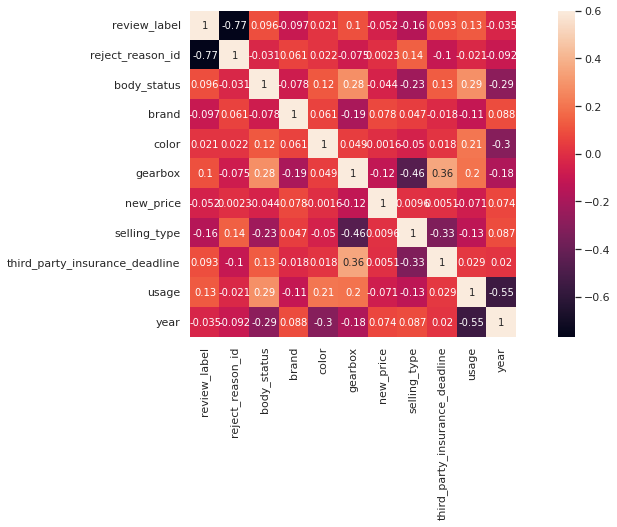

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(dffff.drop('post_id',axis=1).corr(), vmax=0.6, square=True, annot=True)

We delete some columns which I think are not important.

# Feature Extraction
In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

In [ ]:
dffff=dffff.drop("brand_model",axis=1)

In [ ]:
dffff=dffff.drop(["post_data","post_type","category","document","usage"],axis=1)

In [ ]:
dffff=dffff.drop('options',axis=1)

In [ ]:
dffff=dffff.drop('new_price',axis=1)

In [ ]:
dffff.to_csv('dffff.csv', index=False)

In [ ]:
pd.read_csv('dffff.csv')

,post_id,review_label,reject_reason_id,body_status,brand,color,description,gearbox,selling_type,third_party_insurance_deadline,title,year,text
0,cb000599-2ee2-42c1-9f0e-32cfeb940398,1,0,1,1,1,بدون رنگ کم کارکرد,1,1,5,تیبا صندوق‌دار SX، مدل ۱۳۹۷,1397,تیبا صندوق‌دار SX، مدل ۱۳۹۷ بدون رنگ کم کارکرد
1,12063741-6634-444b-befa-0be4c95c2b42,0,13,1,2,1,اسفند 95بیمه بدنه کلا تخفیف مانیتور 10 اینج ان...,1,1,1,لیفان X60 دنده‌ای، مدل ۱۳۹۵,1395,لیفان X60 دنده‌ای، مدل ۱۳۹۵ اسفند 95بیمه بدنه ...
2,81c93119-5c06-412f-80aa-363ddb0ebc33,1,0,1,3,2,بیمه شخص ثالث بیمه بدنه دارای روکش صندلی و کفی...,1,1,8,پژو 405 SLX بنزینی، مدل ۱۳۹۹,1399,پژو 405 SLX بنزینی، مدل ۱۳۹۹ بیمه شخص ثالث بیم...
3,b5a5bfa7-03be-408b-b4d9-bca26c0ca59b,1,0,0,30,3,نمایندگی رجبی کد ۵٣٠٧٣٢ فروش نقدی شعبه توحی...,0,2,0,دنا DENA معمولی EF7 صفر // مدل 99 خشک آماده تحویل,1399,دنا DENA معمولی EF7 صفر // مدل 99 خشک آماده تح...
4,3414e920-dfaf-44a8-9853-0b03d66e9e2a,0,12,2,4,1,ماشین صفر برج ۹سال ۹۹ سند رهن ایران خودرو,1,1,7,پژو 206 SD V8، مدل ۱۳۹۹,1399,پژو 206 SD V8، مدل ۱۳۹۹ ماشین صفر برج ۹سال ۹۹ ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540357,57d8583a-762d-49df-a1ea-fde6ae63e35b,1,0,0,30,3,اریزو ٩٩ صفرفول توربوفوری,0,2,0,اریزو صفر ٩٩,1398,اریزو صفر ٩٩ اریزو ٩٩ صفرفول توربوفوری
540358,7bace186-9fc3-450b-9c23-3a109fa1f455,0,145,9,7,1,مصرف کننده و خریدار ماشین با مشخصات فوق هستم ...,1,1,6,پژو پارس سال، مدل ۱۳۹۶,1396,پژو پارس سال، مدل ۱۳۹۶ مصرف کننده و خریدار ماش...
540359,d8014824-d3e7-4a0a-9863-df11021f23d4,1,0,9,11,8,دور رنگ از جلو ضربه کوچک دارد لاستیک ۷۰درصد تک...,1,1,5,پراید سفری، مدل ۱۳۸۵,1385,پراید سفری، مدل ۱۳۸۵ دور رنگ از جلو ضربه کوچک ...
540360,ee2bdfaf-773e-430e-9e04-cc250e7a27c6,1,0,1,8,1,صفر سند آزاد آماده انتقال,0,1,0,پراید۱۵۱ se صفر,1399,پراید۱۵۱ se صفر صفر سند آزاد آماده انتقال


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
!cp dffff.csv "drive/My Drive/"

In [ ]:
!git init

Reinitialized existing Git repository in /content/.git/


In [ ]:
!git clone https://github.com/Didehkhani/DivardataNLP.git

Cloning into 'DivardataNLP'...


In [ ]:
! pwd

/content


In [ ]:
%cd DivardataNLP/

/content/DivardataNLP


In [ ]:
! git remote -v

origin	https://github.com/Didehkhani/DivardataNLP.git (fetch)
origin	https://github.com/Didehkhani/DivardataNLP.git (push)


In [ ]:
! git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [ ]:
! git add -A

In [ ]:
! git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [ ]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content/DivardataNLP
